In [1]:
# 2023 Gabriel J. Diaz @ RIT

import os
import sys
import numpy as np
import av
import logging
import pickle
from tqdm import tqdm

import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from pathlib import Path, PurePath


logger = logging.getLogger(__name__)
logger.addHandler(logging.StreamHandler(stream=sys.stdout))

In [2]:
    
file_path = Path('/Users/gjdpci/Documents/GitHub/retinal_flow_toolkit/demo_input_video/linear_travel.mp4')


In [3]:
container_in = av.open(file_path.as_posix())
average_fps = container_in.streams.video[0].average_rate
num_frames = container_in.streams.video[0].frames
time_base = container_in.streams.video[0].time_base

container_out = av.open('vid_out.mp4', mode="w", timeout = None)
stream = container_out.add_stream("libx264", framerate = average_fps)
stream.options["crf"] = "20"
stream.pix_fmt = "yuv420p"
stream.time_base = container_in.streams.video[0].time_base
stream.codec_context.time_base = container_in.streams.video[0].codec_context.time_base

pts = []
dts = []
frame_time_base = []
relative_time = []

# for raw_frame in container_in.decode(video=0):
for raw_frame in tqdm(container_in.decode(video=0), desc="Working.", unit= 'frames',total = num_frames):

    pts.append(raw_frame.pts)
    dts.append(raw_frame.dts)
    frame_time_base.append(raw_frame.time_base)
    relative_time.append( np.float32(raw_frame.pts * raw_frame.time_base) )
    
    for packet in stream.encode(raw_frame):
        
        # Add packet to video
        if fps is False or fps is None:
            packet.time_base = raw_frame.time_base
            packet.dts = raw_frame.dts
            packet.pts = raw_frame.pts
            container_out.mux(packet)

# Flush stream
for packet in stream.encode():
    container_out.mux(packet)

container_out.close()

/var/folders/gy/wzd471c14k762xp4b_xt87xr0000gq/T/ipykernel_59717/2938558645.py:11: AVDeprecationWarning: Using CodecContext.time_base for decoders is deprecated.
  stream.codec_context.time_base = container_in.streams.video[0].codec_context.time_base
Working.: 100%|████████████████████████████| 30/30 [00:00<00:00, 123.01frames/s]


In [4]:
container_in = av.open('vid_out.mp4')
time_base_out = container_in.streams.video[0].time_base

pts_out = []
dts_out = []
frame_time_base_out = []
relative_time_out = []

# for raw_frame in container_in.decode(video=0):
for raw_frame in tqdm(container_in.decode(video=0), desc="Working.", unit= 'frames',total = num_frames):

    pts_out.append(raw_frame.pts)
    dts_out.append(raw_frame.dts)
    frame_time_base_out.append(raw_frame.time_base)
    relative_time_out.append( np.float32(raw_frame.pts * raw_frame.time_base) )
    

Working.: 100%|███████████████████████████| 30/30 [00:00<00:00, 1310.05frames/s]


Text(0.5, 0, 'frame_time_base')

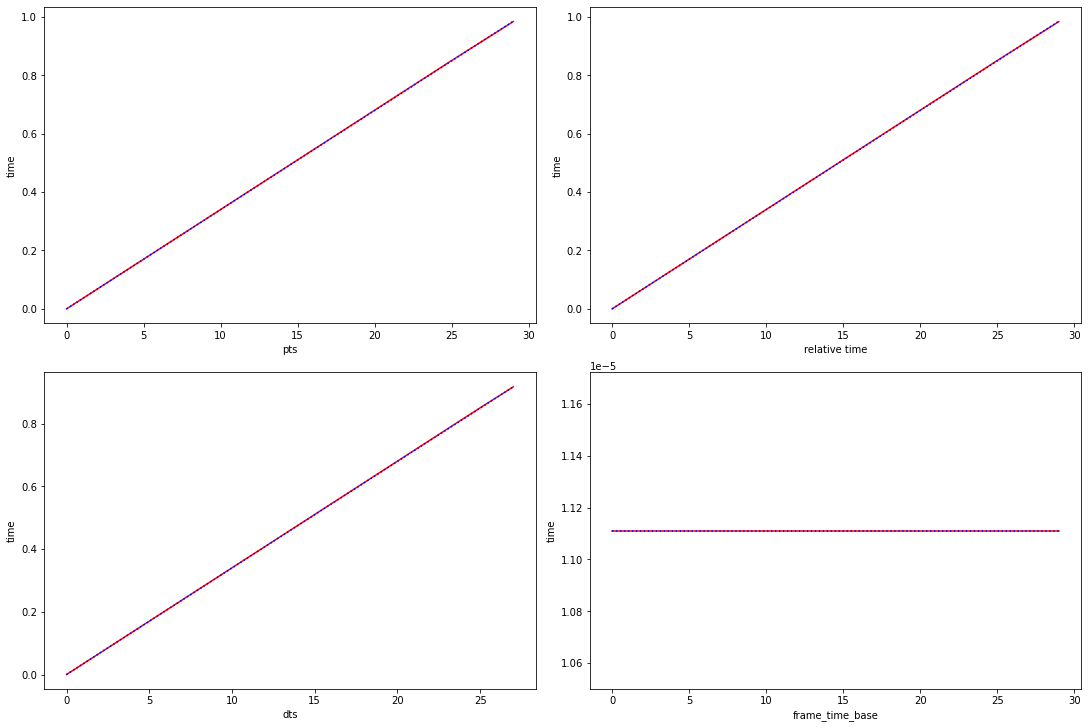

In [7]:
dts = np.array(dts)
dts[np.where(dts == None)] = np.nan

dts_out = np.array(dts_out)
dts_out[np.where(dts_out == None)] = np.nan

fig, ax = plt.subplots(figsize=(15, 10), layout='constrained')

plt.subplot(2,2,1)
plt.plot(np.arange(0,len(pts)) ,np.array(pts) * float(time_base),'r')
plt.plot(np.arange(0,len(pts_out)) ,np.array(pts_out) * float(time_base_out),':b')
plt.ylabel('time')
plt.xlabel('pts')

plt.subplot(2,2,2)
plt.plot( relative_time,'r')
plt.plot( relative_time_out,':b')
plt.ylabel('time')
plt.xlabel('relative time')

plt.subplot(2,2,3)
plt.plot(np.arange(0,len(dts)) ,np.array(dts) * float(time_base),'r')
plt.plot(np.arange(0,len(dts_out)) ,np.array(dts_out) * float(time_base_out),':b')
plt.ylabel('time')
plt.xlabel('dts')


plt.subplot(2,2,4)
plt.plot(np.arange(0,len(frame_time_base)),frame_time_base,'r')
plt.plot(np.arange(0,len(frame_time_base_out)),frame_time_base_out,':b')
plt.ylabel('time')
plt.xlabel('frame_time_base')

